### Importing & formatting Weather data

In this part of the notebook, the daily weather obtained from Oikolab is imported. The grid point data with grid id, lat (Y) & lon (X) are merged with weather data so that the data can be sorted based on grid id.

After merging weather & grid data, the weather data is aggregated by month for each grid point and sorted by grid id & date (month + year). Sorting by time for each point **is needed** for getting the calculations right using [climate_indices](https://github.com/monocongo/climate_indices/) package.

**Note:** [Climate_indices](https://github.com/monocongo/climate_indices/) package is needed to be installed.

In [17]:
# Load the senegal dataset
import pandas as pd
import numpy as np
import os
# os.chdir('..')

grid_loc = pd.read_csv('/data/geom/grid_025x025_deg_approx_senegal.csv')
grid_loc.head(3)

daily_weather_names = ['temperature', 
              'relative_humidity', 
              'humidex', 
              'surface_solar_radiation', 
              'surface_thermal_radiation', 
              'surface_direct_solar_radiation', 
              'wind_speed', 
             'wind_direction', 
              'soil_temperature_level_1', 
              'soil_temperature_level_2', 
              'soil_temperature_level_3', 
              'soil_temperature_level_4', 
              'total_precipitation',
              'year',
           'month',
            'week',
             'day',
             'daysOfWeek',
             'gpslat',
              'gpslon' ]
weather4spei = pd.read_csv('C:/Sandeep/Learning/Omdena/GPSDD/data/senegal_weather_1970_2020_low_res_327_points_data.csv',
                          names = daily_weather_names)

# l.head()
weather4spei.tail()


,temperature,relative_humidity,humidex,surface_solar_radiation,surface_thermal_radiation,surface_direct_solar_radiation,wind_speed,wind_direction,soil_temperature_level_1,soil_temperature_level_2,soil_temperature_level_3,soil_temperature_level_4,total_precipitation,year,month,week,day,daysOfWeek,gpslat,gpslon
18641,26.38,0.09,22.58,245,326,NaN,1.27,76.53,27.47,28.11,27.97,27.68,0.0,2021,1,2,14,4,12.442072,-11.543186
18642,26.11,0.10,22.36,245,326,NaN,1.35,92.78,27.25,28.04,27.97,27.69,0.0,2021,1,2,15,5,12.442072,-11.543186
18643,25.81,0.10,22.06,271,328,NaN,1.79,88.40,26.64,27.97,27.96,27.69,0.0,2021,1,2,16,6,12.442072,-11.543186
18644,25.91,0.10,22.16,244,328,NaN,1.28,90.33,26.72,27.88,27.95,27.70,0.0,2021,1,2,17,7,12.442072,-11.543186
18645,21.18,0.13,17.38,3,327,NaN,0.91,242.70,27.41,27.87,27.94,27.70,0.0,2021,1,3,18,1,12.442072,-11.543186


In [19]:
# Merge with grid to add location id column
# Need to use this to sort weather data by location

weather4spei = weather4spei.merge(grid_loc,how='left', left_on=['gpslon','gpslat'], right_on=['X','Y'])
weather4spei.head(3)

,temperature,relative_humidity,humidex,surface_solar_radiation,surface_thermal_radiation,surface_direct_solar_radiation,wind_speed,wind_direction,soil_temperature_level_1,soil_temperature_level_2,...,year,month,week,day,daysOfWeek,gpslat,gpslon,X,Y,id
0,27.42,0.31,28.24,212,363,151.01,2.28,17.70,28.33,27.80,...,1970,1,1,1,4,16.692072,-16.043186,-16.043186,16.692072,6
1,27.92,0.28,28.25,195,374,115.15,2.79,45.00,28.92,28.37,...,1970,1,1,2,5,16.692072,-16.043186,-16.043186,16.692072,6
2,26.82,0.40,29.16,190,380,105.09,4.57,350.42,28.74,28.74,...,1970,1,1,3,6,16.692072,-16.043186,-16.043186,16.692072,6


In [23]:
weather4spei.drop(['X','Y'],axis=1,inplace=True)
weather4spei.head(3)

,temperature,relative_humidity,humidex,surface_solar_radiation,surface_thermal_radiation,surface_direct_solar_radiation,wind_speed,wind_direction,soil_temperature_level_1,soil_temperature_level_2,...,soil_temperature_level_4,total_precipitation,year,month,week,day,daysOfWeek,gpslat,gpslon,id
0,27.42,0.31,28.24,212,363,151.01,2.28,17.70,28.33,27.80,...,29.57,0.0,1970,1,1,1,4,16.692072,-16.043186,6
1,27.92,0.28,28.25,195,374,115.15,2.79,45.00,28.92,28.37,...,29.54,0.0,1970,1,1,2,5,16.692072,-16.043186,6
2,26.82,0.40,29.16,190,380,105.09,4.57,350.42,28.74,28.74,...,29.52,0.0,1970,1,1,3,6,16.692072,-16.043186,6


In [25]:
# Aggregting daily data to monthly

weather4spei_monthly = weather4spei.groupby(['year','month','gpslat','gpslon']).agg({'total_precipitation':'sum',
                                                                                     'temperature':'mean',
                                                                                    'relative_humidity':'mean',
                                                                                    'humidex':'mean',
                                                                                    'surface_solar_radiation':'mean',
                                                                                    'surface_thermal_radiation':'mean',
                                                                                    'surface_direct_solar_radiation':'mean',
                                                                                    'soil_temperature_level_1':'mean',
                                                                                    'soil_temperature_level_2':'mean',
                                                                                    'soil_temperature_level_3':'mean',
                                                                                    'soil_temperature_level_4':'mean',
                                                                                    'id':'first'})
weather4spei_monthly.head()

total_precipitation  temperature  \
year month gpslat    gpslon                                         
1970 1     12.442072 -16.793186                  0.0    23.961765   
                     -16.543186                  0.0    25.300000   
                     -16.293186                  0.0    25.757647   
                     -16.043186                  0.0    25.702059   
                     -15.793186                  0.0    25.497647   

                                 relative_humidity    humidex  \
year month gpslat    gpslon                                     
1970 1     12.442072 -16.793186           0.598235  28.441765   
                     -16.543186           0.447647  27.865882   
                     -16.293186           0.387647  27.455588   
                     -16.043186           0.381471  27.265588   
                     -15.793186           0.381471  26.975000   

                                 surface_solar_radiation  \
year month gpslat    gpslon                                
1970 1     12.442072 -16.793186               238.058824   
                     -16.543186               238.294118   
                     -16.293186               238.529412   
                     -16.043186               238.558824   
                     -15.793186               238.411765   

                                 surface_thermal_radiation  \
year month gpslat    gpslon                                  
1970 1     12.442072 -16.793186                 339.823529   
                     -16.543186                 343.735294   
                     -16.293186                 346.294118   
                     -16.043186                 347.705882   
                     -15.793186                 347.500000   

                                 surface_direct_solar_radiation  \
year month gpslat    gpslon                                       
1970 1     12.442072 -16.793186                      180.009412   
                     -16.543186                      179.907941   
                     -16.293186                      179.779412   
                     -16.043186                      179.587941   
                     -15.793186                      179.302353   

                                 soil_temperature_level_1  \
year month gpslat    gpslon                                 
1970 1     12.442072 -16.793186                 23.664412   
                     -16.543186                 25.431471   
                     -16.293186                 25.737941   
                     -16.043186                 25.626176   
                     -15.793186                 25.765000   

                                 soil_temperature_level_2  \
year month gpslat    gpslon                                 
1970 1     12.442072 -16.793186                 23.864412   
                     -16.543186                 25.907647   
                     -16.293186                 26.365588   
                     -16.043186                 26.257647   
                     -15.793186                 26.380588   

                                 soil_temperature_level_3  \
year month gpslat    gpslon                                 
1970 1     12.442072 -16.793186                 23.926765   
                     -16.543186                 26.114706   
                     -16.293186                 26.681471   
                     -16.043186                 26.547353   
                     -15.793186                 26.652059   

                                 soil_temperature_level_4   id  
year month gpslat    gpslon                                     
1970 1     12.442072 -16.793186                 24.018235  428  
                     -16.543186                 26.404412  429  
                     -16.293186                 27.116471  430  
                     -16.043186                 26.970000  431  
                     -15.793186                 27.027647  432

In [31]:
weather4spei_monthly.reset_index(inplace=True)
weather4spei_monthly.head()

,year,month,gpslat,gpslon,total_precipitation,temperature,relative_humidity,humidex,surface_solar_radiation,surface_thermal_radiation,surface_direct_solar_radiation,soil_temperature_level_1,soil_temperature_level_2,soil_temperature_level_3,soil_temperature_level_4,id
0,1970,1,16.692072,-16.043186,0.00,23.194412,0.333824,22.962059,231.441176,321.000000,173.120000,24.512353,25.345588,26.505000,29.255000,6
1,1970,2,16.692072,-16.043186,0.00,25.701786,0.325000,25.835714,239.714286,349.035714,168.727857,27.333571,27.025714,26.521071,28.273929,6
2,1970,3,16.692072,-16.043186,0.00,25.656452,0.401613,27.049355,288.419355,343.258065,216.963226,28.188387,28.153226,28.197419,28.140645,6
3,1970,4,16.692072,-16.043186,0.03,28.186000,0.319333,28.936333,317.600000,345.333333,247.384667,30.874333,30.357333,29.361000,28.247000,6
4,1970,5,16.692072,-16.043186,0.00,26.190968,0.521935,30.060968,315.419355,362.225806,246.730968,30.200000,30.270000,30.381613,28.838387,6


### Get Climate Indices 

#### Using in-built functions in climate_indices package to calculate indices

In [28]:
from climate_indices import indices
from climate_indices.compute import Periodicity

In [32]:
weather4spei_monthly.shape

(200451, 16)

In [33]:
start_year = 1970
end_year = 2020
# removing any data in 2021
# Reason is that SPEI calculation
# assumes a whole year's data is available.
# 
weather4spei_monthly = weather4spei_monthly[weather4spei_monthly['year']<2021]


In [46]:
# monthly precipitation needs to be total not avg.

## CALCULATION OF SPEI ##

# the number of months over which the values should be scaled
#         before computing the indicator
scale_in_mon = [1,3,6,12,24,48] 
gridpts = weather4spei_monthly['id'].unique()
total_months = (2020-1970+1)*12

spei_values_pearson = np.zeros((weather4spei_monthly.shape[0],len(scale_in_mon)))

j = 0

# for each grid pt
for ptno, pt in enumerate(gridpts):
    pt_mask = weather4spei_monthly['id']==pt
    # PET is a required input to SPEI
    pet = indices.pet(weather4spei_monthly[pt_mask]['temperature'].to_numpy(), 
                      weather4spei_monthly[pt_mask]['gpslat'].to_numpy(), start_year)
    # for each scale level
    for i, scale in enumerate(scale_in_mon):
        spei_values_pearson[j:j+total_months,i] = \
            indices.spei(weather4spei_monthly[pt_mask]['total_precipitation'].to_numpy(),
                                  pet,
                                 scale,
                                 indices.Distribution.pearson,
                                 Periodicity.monthly,
                                 start_year,
                                 start_year,
                                 end_year)
    j += total_months
    #print(scale)


In [47]:
print(spei_values_pearson[-10:])
spei_values_pearson.shape
#print(spei_values[-10:])

[[-1.21647943 -1.71904124 -1.65236946 -2.15648941 -1.71627624 -1.7892963 ]
 [-1.64992081 -1.70408432 -1.89087147 -2.2550366  -1.78854808 -1.78250857]
 [-1.18327149 -1.55415463 -1.81418648 -2.09091979 -1.70932829 -1.78115208]
 [-0.67953502 -1.35170225 -1.66100212 -1.70436442 -1.63312408 -1.75698224]
 [-0.67918894 -1.09670251 -1.57916129 -1.6565754  -1.63866511 -1.75908744]
 [-1.13025117 -0.89276011 -1.45327435 -1.67464828 -1.69268962 -1.74904738]
 [-0.38667363 -0.7949752  -1.32316679 -1.63681411 -1.70955648 -1.72237839]
 [-0.67790589 -0.82982468 -1.13255695 -1.70482301 -1.69885331 -1.6919805 ]
 [-0.82037434 -0.73793956 -0.88224019 -1.64492928 -1.68281381 -1.68310199]
 [-2.26854504 -1.54794755 -1.33963093 -1.71284213 -1.74960908 -1.72067729]]


(200124, 6)

<AxesSubplot:>

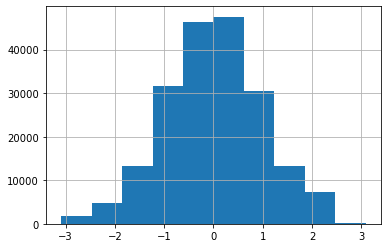

In [50]:
# Sample plot to check
weather4spei_monthly['spei_12mon'].hist()

In [48]:
# Update weather data frame with appropriate SPEI values
weather4spei_monthly.loc[:,'spei_1mon'] = spei_values_pearson[:,0]
weather4spei_monthly.loc[:,'spei_3mon'] = spei_values_pearson[:,1]
weather4spei_monthly.loc[:,'spei_6mon'] = spei_values_pearson[:,2]
weather4spei_monthly.loc[:,'spei_12mon'] = spei_values_pearson[:,3]
weather4spei_monthly.loc[:,'spei_24mon'] = spei_values_pearson[:,4]
weather4spei_monthly.loc[:,'spei_48mon'] = spei_values_pearson[:,5]

# Export all weather & SPEI to csv
weather4spei_monthly.to_csv('spei_1970_2020_025x025_v3.csv')

weather4spei_monthly.tail(3)

,year,month,gpslat,gpslon,total_precipitation,temperature,relative_humidity,humidex,surface_solar_radiation,surface_thermal_radiation,...,soil_temperature_level_2,soil_temperature_level_3,soil_temperature_level_4,id,spei_1mon,spei_3mon,spei_6mon,spei_12mon,spei_24mon,spei_48mon
200447,2020,10,12.442072,-11.543186,4.70,27.429677,0.747419,37.265161,247.612903,394.677419,...,27.354516,27.666452,28.319677,449,-0.677906,-0.829825,-1.132557,-1.704823,-1.698853,-1.691980
200448,2020,11,12.442072,-11.543186,0.01,27.442667,0.437667,30.932333,246.766667,363.300000,...,27.891000,27.932000,28.086000,449,-0.820374,-0.737940,-0.882240,-1.644929,-1.682814,-1.683102
200449,2020,12,12.442072,-11.543186,0.00,27.647273,0.364545,29.672727,229.090909,360.484848,...,27.931818,27.903636,27.999091,449,-2.268545,-1.547948,-1.339631,-1.712842,-1.749609,-1.720677


### END OF CALCULATION

### SPEI data ingestion from SPEI Global Drought Monitor
https://spei.csic.es/map/maps.html
In netCDF format @ 1x1 deg & monthly resolution

"...based on the Thortnthwaite equation for estimating potential evapotranspiration, PET. This is due to the lack of real-time data sources for computing more robust PET estimations which have larger data requirements. The main advantage of the SPEI Global Drought Monitor is thus its near real-time character, a characteristic best suited for drought monitoring and early warning purposes. "

In [1]:
import os, warnings
import matplotlib.pyplot as plt
import xarray as xr
import netCDF4

os.chdir('..')


In [4]:
spei_1mon = xr.open_dataset('data/spei_1x1/spei01.nc')
spei_1mon


<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 852)
Coordinates:
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2020-12-01
Data variables:
    spei     (time, lat, lon) float32 ...

In [5]:
# Senegal BBox
# Left top: -17.580,16.671
# Right bottom: -11.635,12.364
spei_1mon_senbb = spei_1mon.sel(lat=slice(12.364,16.671),lon=slice(-17.580,-11.635))
spei_1mon_senbb

<xarray.Dataset>
Dimensions:  (lat: 5, lon: 6, time: 852)
Coordinates:
  * lon      (lon) float64 -17.5 -16.5 -15.5 -14.5 -13.5 -12.5
  * lat      (lat) float64 12.5 13.5 14.5 15.5 16.5
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2020-12-01
Data variables:
    spei     (time, lat, lon) float32 ...

As it can be seen from the dimension of the data, there are 30 1x1 deg grid points with 852 months (1950-2020) of SPEI data.

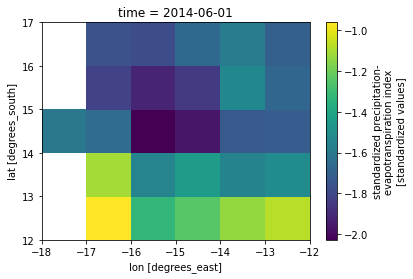

In [12]:
# plotting
spei_1mon_senbb.spei.sel(time='2014-06-01').plot()

In [9]:
spei_df = spei_1mon_senbb.to_dataframe().reset_index()

spei_df.tail()

,lat,lon,time,spei
25555,16.5,-12.5,2020-08-01,-1.118685
25556,16.5,-12.5,2020-09-01,1.341718
25557,16.5,-12.5,2020-10-01,-0.948455
25558,16.5,-12.5,2020-11-01,-1.466989
25559,16.5,-12.5,2020-12-01,-2.102992


In [26]:
# SPEI at 0.5x0.5 deg resolution

spei_05_1mon = xr.open_dataset('C:/Sandeep/Learning/Omdena/GPSDD/data/spei_05x05/spei01.nc')
#spei_05_1mon
spei_1mon_senbb = spei_05_1mon.sel(lat=slice(12.364,16.671),lon=slice(-17.580,-11.635))
spei_1mon_senbb

<xarray.Dataset>
Dimensions:  (lat: 8, lon: 12, time: 1416)
Coordinates:
  * lon      (lon) float64 -17.25 -16.75 -16.25 -15.75 ... -12.75 -12.25 -11.75
  * lat      (lat) float64 12.75 13.25 13.75 14.25 14.75 15.25 15.75 16.25
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2018-12-16
Data variables:
    spei     (time, lat, lon) float32 ...
Attributes:
    Title:        Global 1-month SPEI, z-values, 0.5 degree
    Version:      2.6
    Id:           ./outputNcdf/spei01.nc
    Summary:      Global dataset of the Standardized\n\t  Precipitation-Evapo...
    Keywords:     drought, climatology, SPEI, Standardized\n\t  Precipitation...
    Institution:  Consejo Superior de Investigaciones\n\t          Científica...
    Url:          http://sac.csic.es/spei
    Creators:     Santiago Beguería <santiago.begueria@csic.es>\n\t          ...
    Software:     Created in R using the SPEI package\n\t          (https://c...
    Call:         spei.nc(sca=i, inPre=./inputData/cru_ts4.03.1901.2018.pre.d...
    Date:         Wed Feb 12 13:48:58 2020
    Reference:    Beguería S., Vicente-Serrano S., Reig F., Latorre B. (2014)...
    Reference2:   Vicente-Serrano S.M., Beguería S., López-Moreno J.I. (2010)...
    Reference3:   Beguería S., Vicente-Serrano S., Angulo-Martínez M. (2010) ...

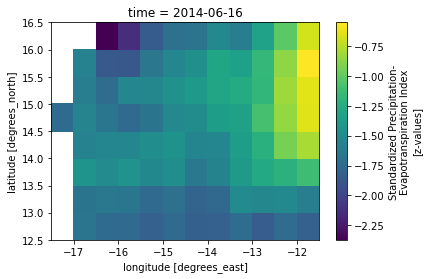

In [28]:
spei_1mon_senbb.spei.sel(time='2014-06-16').plot()

##### Exporting all SPEI indices to csv

In [50]:
spei_file = 'C:/Sandeep/Learning/Omdena/GPSDD/data/spei_05x05/spei01.nc'
spei_file2 = 'C:/Sandeep/Learning/Omdena/GPSDD/data/spei_05x05/spei03.nc'
spei_file3 = 'C:/Sandeep/Learning/Omdena/GPSDD/data/spei_05x05/spei06.nc'
spei_file4 = 'C:/Sandeep/Learning/Omdena/GPSDD/data/spei_05x05/spei12.nc'
spei_file5 = 'C:/Sandeep/Learning/Omdena/GPSDD/data/spei_05x05/spei24.nc'
spei_file6 = 'C:/Sandeep/Learning/Omdena/GPSDD/data/spei_05x05/spei48.nc'
# spei_file7 = 'C:/Sandeep/Learning/Omdena/GPSDD/data/spei_05x05/spei36.nc'
# spei_file8 = 'C:/Sandeep/Learning/Omdena/GPSDD/data/spei_05x05/spei48.nc'

spei_DS = xr.open_dataset(spei_file)
spei_senbb_df = spei_DS.sel(lat=slice(12.364,16.671),lon=slice(-17.580,-11.635)).to_dataframe().reset_index()

final_df = spei_senbb_df
final_df.rename(columns={'spei':'spei_1mon'},inplace=True)

spei_DS = xr.open_dataset(spei_file2)
spei_senbb_df = spei_DS.sel(lat=slice(12.364,16.671),lon=slice(-17.580,-11.635)).to_dataframe().reset_index()
final_df['spei_3mon'] = spei_senbb_df.iloc[:,-1:].to_numpy()

spei_DS = xr.open_dataset(spei_file3)
spei_senbb_df = spei_DS.sel(lat=slice(12.364,16.671),lon=slice(-17.580,-11.635)).to_dataframe().reset_index()
final_df['spei_6mon'] = spei_senbb_df.iloc[:,-1:].to_numpy()

spei_DS = xr.open_dataset(spei_file4)
spei_senbb_df = spei_DS.sel(lat=slice(12.364,16.671),lon=slice(-17.580,-11.635)).to_dataframe().reset_index()
final_df['spei_12mon'] = spei_senbb_df.iloc[:,-1:].to_numpy()

spei_DS = xr.open_dataset(spei_file5)
spei_senbb_df = spei_DS.sel(lat=slice(12.364,16.671),lon=slice(-17.580,-11.635)).to_dataframe().reset_index()
final_df['spei_24mon'] = spei_senbb_df.iloc[:,-1:].to_numpy()

spei_DS = xr.open_dataset(spei_file6)
spei_senbb_df = spei_DS.sel(lat=slice(12.364,16.671),lon=slice(-17.580,-11.635)).to_dataframe().reset_index()
final_df['spei_48mon'] = spei_senbb_df.iloc[:,-1:].to_numpy()

print(final_df.head(3))
final_df.to_csv('C:/Sandeep/Learning/Omdena/GPSDD/data/spei_05x05/spei_1901_2020_05x05.csv')




     lat    lon       time  spei_1mon  spei_3mon  spei_6mon  spei_12mon  \
0  12.75 -17.25 1901-01-16        NaN        NaN        NaN         NaN   
1  12.75 -17.25 1901-02-15        NaN        NaN        NaN         NaN   
2  12.75 -17.25 1901-03-16        NaN        NaN        NaN         NaN   

   spei_24mon  spei_48mon  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  


#### Using command line in climate_indices package to calculate indices

In [104]:
%%cmd
process_climate_indices --index spei --periodicity monthly --netcdf_precip Precip_2010_2019_monthly.nc --var_name_precip  precip --netcdf_temp Temp_2010_2019_monthly.nc --var_name_temp temp --output_file_base spei_2010_2019_monthly --scales 9 18 --calibration_start_year 2010 --calibration_end_year 2019

Microsoft Windows [Version 10.0.18363.1256]
(c) 2019 Microsoft Corporation. All rights reserved.

(omdena-GPSDD) C:\Sandeep\Learning\Omdena\GPSDD\notebooks>process_climate_indices --index spei --periodicity monthly --netcdf_precip Precip_2010_2019_monthly.nc --var_name_precip  precip --netcdf_temp Temp_2010_2019_monthly.nc --var_name_temp temp --output_file_base spei_2010_2019_monthly --scales 9 18 --calibration_start_year 2010 --calibration_end_year 2019
Error in calling operator ncpdq with:
>>> C:\Anaconda3\envs\omdena-GPSDD\Library\bin\ncpdq -a division,time -O --output=C:\Users\mudig\AppData\Local\Temp\ncpdq_Temp_2010_2019_monthly.ncr61qlgjo.tmp Temp_2010_2019_monthly.nc <<<
Inputs: Temp_2010_2019_monthly.nc
b'Access is denied.\r\n'

(omdena-GPSDD) C:\Sandeep\Learning\Omdena\GPSDD\notebooks>

2021-01-08  22:21:44 INFO Start time:    2021-01-08 22:21:44.140717
2021-01-08  22:21:44 ERROR Failed to complete
Traceback (most recent call last):
  File "c:\anaconda3\envs\omdena-gpsdd\lib\site-packages\climate_indices\__main__.py", line 1698, in main
    arguments.netcdf_temp, arguments.var_name_temp
  File "c:\anaconda3\envs\omdena-gpsdd\lib\site-packages\climate_indices\__main__.py", line 1534, in _prepare_file
    options=[f'-a "{dims}"', "-O"])
  File "c:\anaconda3\envs\omdena-gpsdd\lib\site-packages\nco\nco.py", line 342, in get
    raise NCOException(**retvals)
nco.nco.NCOException: (returncode:1) b'Access is denied.\r\n'
Traceback (most recent call last):
  File "c:\anaconda3\envs\omdena-gpsdd\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\anaconda3\envs\omdena-gpsdd\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Anaconda3\envs\omdena-GPSDD\Scripts\process_climate_indices.exe\__main__.py", line 7, in <module>